# Case Study

## Visualizing your data

Since 1800, life expectancy around the globe has been steadily going up. You would expect the Gapminder data to confirm this.

The DataFrame g1800s has been pre-loaded. Your job in this exercise is to create a scatter plot with life expectancy in '1800' on the x-axis and life expectancy in '1899' on the y-axis.

Here, the goal is to visually check the data for insights as well as errors. When looking at the plot, pay attention to whether the scatter plot takes the form of a diagonal line, and which points fall below or above the diagonal line. This will inform how life expectancy in 1899 changed (or did not change) compared to 1800 for different countries. If points fall on a diagonal line, it means that life expectancy remained the same!

In [10]:
# Import pandas and matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
g1800s = pd.read_csv('g1800s.csv', encoding = "ISO-8859-1")
g1800s.drop(['Unnamed: 0'], axis=1, inplace=True)

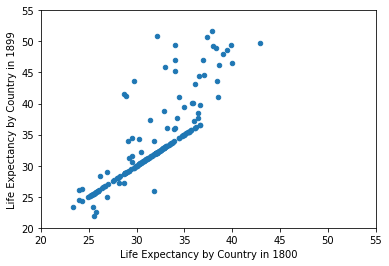

In [12]:
# Create the scatter plot
g1800s.plot(kind='scatter', x='1800', y='1899')

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

# Display the plot
plt.show()

## Thinking about the question at hand

Since you are given life expectancy level data by country and year, you could ask questions about how much the average life expectancy changes over each year.

Before continuing, however, it's important to make sure that the following assumptions about the data are true:

'Life expectancy' is the first column (index 0) of the DataFrame.<br/>
The other columns contain either null or numeric values.<br/>
The numeric values are all greater than or equal to 0.<br/>
There is only one instance of each country.<br/><br/>
You can write a function that you can apply over the entire DataFrame to verify some of these assumptions. Note that spending the time to write such a script will help you when working with other datasets as well.

In [13]:
def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

In [14]:
# Check whether the first column is 'Life expectancy'
assert g1800s.columns[0] == 'Life expectancy'

In [15]:
# Check whether the values in the row are valid
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

In [20]:
g1800s.drop_duplicates(['Life expectancy'], inplace=True)

In [21]:
# Check that there is only one instance of each country
assert g1800s['Life expectancy'].value_counts()[0] == 1

In [22]:
gapminder = pd.read_csv('gapminder.csv')
gapminder.drop(['Unnamed: 0'], axis=1, inplace=True)

In [23]:
#print shape of gapminder
print(gapminder.shape)

(780, 218)


In [24]:
#print head of gapminder
print(gapminder.head())

    1800   1801   1802   1803   1804   1805   1806   1807   1808   1809  ...  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   
1  28.21  28.20  28.19  28.18  28.17  28.16  28.15  28.14  28.13  28.12  ...   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   
3  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40  ...   
4  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82  ...   

   2008  2009  2010  2011  2012  2013  2014  2015  2016        Life expectancy  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN               Abkhazia  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN            Afghanistan  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  Akrotiri and Dhekelia  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN                Albania  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN                Algeria  

[5 rows x 218 columns]


## Reshaping your data

Now that you have all the data combined into a single DataFrame, the next step is to reshape it into a <i>tidy</i> data format.<br/>

Currently, the gapminder DataFrame has a separate column for each year. What you want instead is a single column that contains the year, and a single column that represents the average life expectancy for each year and country. By having year in its own column, you can use it as a predictor variable in a later analysis.<br/>

You can convert the DataFrame into the desired tidy format by <i>melting it</i>.

In [25]:
gapminder.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akrotiri and Dhekelia
3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albania
4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria


In [26]:
# Melt gapminder: gapminder_melt
gapminder_melt = pd.melt(gapminder, id_vars=['Life expectancy'])

In [27]:
# Rename the columns
gapminder_melt.columns = ['country', 'year','life_expectancy']

In [28]:
# Print the head of gapminder_melt
print(gapminder_melt.head())

                 country  year  life_expectancy
0               Abkhazia  1800              NaN
1            Afghanistan  1800            28.21
2  Akrotiri and Dhekelia  1800              NaN
3                Albania  1800            35.40
4                Algeria  1800            28.82


## Checking the data types

Now that your data are in the proper shape, you need to ensure that the columns are of the proper data type. That is, you need to ensure that country is of type <i>object</i>, <i>year</i> is of type <i>int64</i>, and <i>life_expectancy</i> is of type <i>float64</i>.<br/>

The tidy DataFrame has been pre-loaded as <b>gapminder</b>. Explore it in the IPython Shell using the .info() method. Notice that the column 'year' is of type object. This is incorrect, so you'll need to use the pd.to_numeric() function to convert it to a numeric data type.<br/>

NumPy and pandas have been pre-imported as np and pd.<br/>

In [29]:
print(gapminder_melt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169260 entries, 0 to 169259
Data columns (total 3 columns):
country            169260 non-null object
year               169260 non-null object
life_expectancy    43857 non-null float64
dtypes: float64(1), object(2)
memory usage: 3.9+ MB
None


In [30]:
# Convert the year column to numeric
gapminder_melt['year'] = pd.to_numeric(gapminder_melt['year'])

In [31]:
# Test if country is of type object
assert gapminder_melt['country'].dtypes == np.object

In [32]:
# Test if year is of type int64
assert gapminder_melt['year'].dtypes == np.int64

In [33]:
# Test if life_expectancy is of type float64
assert gapminder_melt['life_expectancy'].dtypes == np.float64

## Looking at country spellings

Having tidied your DataFrame and checked the data types, your next task in the data cleaning process is to look at the 'country' column to see if there are any special or invalid characters you may need to deal with.<br/>

It is reasonable to assume that country names will contain:<br/>

The set of lower and upper case letters.<br/>
Whitespace between words.<br/>
Periods for any abbreviations.<br/>
To confirm that this is the case, you can leverage the power of regular expressions again. For common operations like this, Pandas has a built-in string method - str.contains() - which takes a regular expression pattern, and applies it to the Series, returning True if there is a match, and False otherwise.<br/>

Since here you want to find the values that do not match, you have to invert the boolean, which can be done using ~. This Boolean series can then be used to get the Series of countries that have invalid names.

In [34]:
# Create the series of countries: countries
countries = gapminder_melt['country']

In [35]:
# Drop all the duplicates from countries
countries = countries.drop_duplicates()

In [36]:
# Write the regular expression: pattern
pattern = '^[A-Za-z\.\s]*$'

In [37]:
# Create the Boolean vector: mask
mask = countries.str.contains(pattern)

In [38]:
# Invert the mask: mask_inverse
mask_inverse = ~mask

In [39]:
# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]

In [40]:
# Print invalid_countries
print(invalid_countries)

49            Congo, Dem. Rep.
50                 Congo, Rep.
53               Cote d'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187             St. Barthélemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                      Åland
Name: country, dtype: object


## More data cleaning and processing

It's now time to deal with the missing data. There are several strategies for this: You can drop them, fill them in using the mean of the column or row that the missing value is in (also known as imputation), or, if you are dealing with time series data, use a forward fill or backward fill, in which you replace missing values in a column with the most recent known value in the column. See pandas Foundations for more on forward fill and backward fill.<br/>

In general, it is not the best idea to drop missing values, because in doing so you may end up throwing away useful information. In this data, the missing values refer to years where no estimate for life expectancy is available for a given country. You could fill in, or guess what these life expectancies could be by looking at the average life expectancies for other countries in that year, for example. Whichever strategy you go with, it is important to carefully consider all options and understand how they will affect your data.<br/>

In this exercise, you'll practice dropping missing values. Your job is to drop all the rows that have <b>NaN</b> in the <i>life_expectancy</i> column. Before doing so, it would be valuable to use assert statements to confirm that <i>year</i> and <i>country</i> do not have any missing values.<br/>

Begin by printing the shape of gapminder in the IPython Shell prior to dropping the missing values. Complete the exercise to find out what its shape will be after dropping the missing values!

In [41]:
# Assert that country does not contain any missing values
assert pd.notnull(gapminder_melt.country).all()

In [42]:
# Assert that year does not contain any missing values
assert pd.notnull(gapminder_melt.year).all()

In [44]:
# Drop the missing values
gapminder = gapminder_melt.dropna()

In [45]:
# Print the shape of gapminder
print(gapminder.shape)

(43857, 3)


## Wrapping up

Now that you have a clean and tidy dataset, you can do a bit of visualization and aggregation. In this exercise, you'll begin by creating a histogram of the <i>life_expectancy</i> column. You should not get any values under 0 and you should see something reasonable on the higher end of the <i>life_expectancy</i> age range.<br/>

Your next task is to investigate how average life expectancy changed over the years. To do this, you need to i) subset the data by each year, ii) get the <i>life_expectancy</i> column from each subset, and iii) take an average of the values. You can achieve this using the .groupby() method. This .groupby() method is covered in greater depth in Manipulating DataFrames with pandas.<br/>

Finally, you can save your tidy and summarized DataFrame to a file using the .to_csv() method.<br/>

matplotlib.pyplot and pandas have been pre-imported as plt and pd. Go for it!<br/>

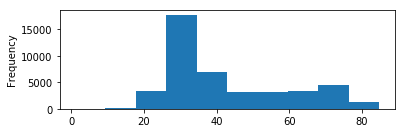

In [47]:
# Add first subplot
plt.subplot(2, 1, 1) 

# Create a histogram of life_expectancy
gapminder['life_expectancy'].plot(kind='hist')

In [48]:
# Group gapminder: gapminder_agg
gapminder_agg = gapminder.groupby('year')['life_expectancy'].mean()

In [49]:
# Print the head of gapminder_agg
print(gapminder_agg.head())

year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64


In [50]:
# Print the tail of gapminder_agg
print(gapminder_agg.tail())

year
2012    71.663077
2013    71.916106
2014    72.088125
2015    72.321010
2016    72.556635
Name: life_expectancy, dtype: float64


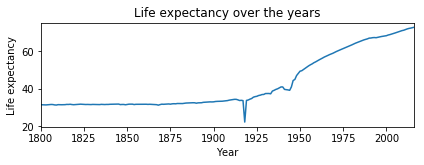

In [51]:
# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

In [105]:
# Save both DataFrames to csv files
gapminder.to_csv('gapminder1.csv')
gapminder_agg.to_csv('gapminder_agg.csv', header=True)
